<a href="https://colab.research.google.com/github/nadeem53/Iris_Data_Analysis/blob/main/Demographic%20Data%20Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import panadas
import pandas as pd

# Load dataset
data = pd.read_csv("/content/adult.data", sep=" ", engine="python", quotechar='"', skipinitialspace=True)

data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]


In [2]:
# To remove commas from all elements:
data = data.apply(lambda row: row.str.replace(",", ""))

In [3]:
# check the first five rows of data
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  object
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  object
 3   education       32560 non-null  object
 4   education-num   32560 non-null  object
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  object
 11  capital-loss    32560 non-null  object
 12  hours-per-week  32560 non-null  object
 13  native-country  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


<Axes: >

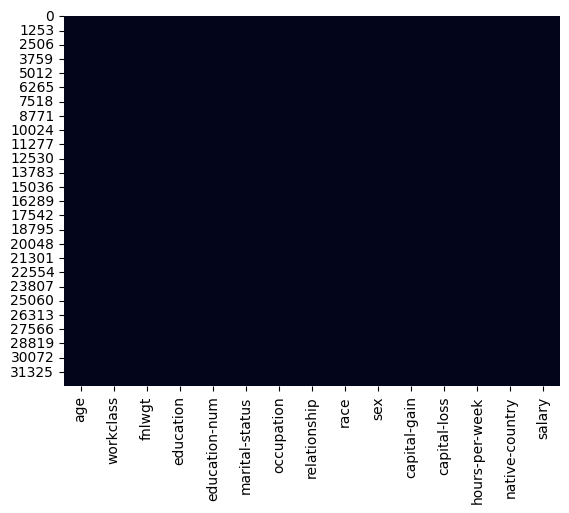

In [5]:
# Import seaborn
import seaborn as sns

# chck null values in data
sns.heatmap(data.isnull(), cbar=False)


1- How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)

In [6]:
# use race column
race_counts = data["race"].value_counts()
race_counts["Total"] = race_counts.sum()
print(race_counts)



White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Total                 32560
Name: race, dtype: int64


In [7]:
# check number of mens in dataset
num_men = len(data[data["sex"] == "Male"])
print(f"Number of men: {num_men}")


Number of men: 21789


2- What is the average age of men?

In [8]:
# Filter for men
men_data = data[data["sex"] == "Male"]

# Calculate average age
average_age = men_data["age"].median()

# Round the average to two decimal places (optional)
average_age = round(average_age, 2)

# Print the answer
print(f"Average age of men: {average_age} years")


Average age of men: 38.0 years


3- What is the percentage of people who have a Bachelor's degree?

In [9]:
education_counts = data["education"].value_counts()
bachelors_count = education_counts["Bachelors"]
total_count = len(data)

percentage_bachelors = round(bachelors_count / total_count * 100, 2)

print(f"Percentage of people with Bachelor's degree: {percentage_bachelors}%")


Percentage of people with Bachelor's degree: 16.44%


4- What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?


In [10]:
advanced_education = ["Bachelors", "Masters", "Doctorate"]
advanced_data = data[data["education"].isin(advanced_education)]
high_salary_data = advanced_data[advanced_data["salary"] == ">50K"]
percentage = round(len(high_salary_data) / len(advanced_data) * 100, 2)
print(f"Percentage of people with advanced education making more than 50K: {percentage}%")


Percentage of people with advanced education making more than 50K: 46.54%


5- What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [11]:
advanced_education = ["Bachelors", "Masters", "Doctorate"]
non_advanced_data = data[~data["education"].isin(advanced_education)]


In [12]:
high_salary_data = non_advanced_data[non_advanced_data["salary"] == ">50K"]


In [13]:
percentage = round(len(high_salary_data) / len(non_advanced_data) * 100, 2)
print(f"Percentage of people without advanced education making more than 50K: {percentage}%")


Percentage of people without advanced education making more than 50K: 17.37%


6- What is the minimum number of hours a person works per week?

In [14]:
min_hours = data["hours-per-week"].min()
print(f"Minimum number of hours worked per week: {min_hours}")


Minimum number of hours worked per week: 1


7- What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

In [15]:
min_work_hours = data["hours-per-week"].min()
print(f"Minimum work hours per week: {min_work_hours}")
min_hours_data = data[data["hours-per-week"] == min_work_hours]
high_salary_data = min_hours_data[min_hours_data["salary"] == ">50K"]
percentage = round(len(high_salary_data) / len(min_hours_data) * 100, 2)
print(f"Percentage of people working {min_work_hours} hours with salary > 50K: {percentage}%")


Minimum work hours per week: 1
Percentage of people working 1 hours with salary > 50K: 10.0%


8- What country has the highest percentage of people that earn >50K and what is that percentage?

Ans. This dataset provided only includes information about individuals within the United States, so it's impossible to compare and determine which country has the highest percentage of earners above 50k based solely on this dataset.

In [16]:
# Select individual from India
india_data = data[data["native-country"] == "India"]

# Filter for high earner
high_salary_india = india_data[india_data["salary"] == ">50K"]

# Count
occupation_counts = high_salary_india["occupation"].value_counts()

# Find most frequent occupation
most_popular_occupation = occupation_counts.idxmax()

# Print result
print(f"Most popular occupation for high earners (>50K) in India: {most_popular_occupation} ({occupation_counts.max()})")


Most popular occupation for high earners (>50K) in India: Prof-specialty (25)


In [17]:
data.shape

(32560, 15)